# 张量

In [1]:
import torch
import numpy as np

In [2]:
data = [[5,6],[7,8]]
#直接生成张量
x_data = torch.tensor(data)
print(f"data:{data}")
print(f"x_data:{x_data}")

data:[[5, 6], [7, 8]]
x_data:tensor([[5, 6],
        [7, 8]])


In [3]:
#numpy 转 tensor
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [9]:
#通过已有的张量来生成新的张量
x_ones = torch.ones_like(x_data)#初始值为1 结构按之前的张量
print(f"x_ones:{x_ones}")
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

x_ones:tensor([[0, 0],
        [0, 0]])
Random Tensor: 
 tensor([[0.2683, 0.1397],
        [0.6471, 0.3798]]) 



In [8]:
#4. 通过指定数据维度来生成张量
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.3531, 0.7878, 0.4339],
        [0.7576, 0.5413, 0.8788]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [10]:
tensor = torch.rand(4,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([4, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [11]:
# 判断当前环境GPU是否可用, 然后将tensor导入GPU内运行
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0


In [30]:
#1. 张量的索引和切片
tensor = torch.ones(4,4)
#冒号:左开右闭
tensor[1:2,2:3] = 0 
#将第2列(从0开始)的数据全部赋值为0
#tensor[:,2] = 0
print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 0., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [19]:
#dim = 0 按行拼接 dim=1 按列拼接
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)

tensor([[1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.]])


In [36]:
#4. 自动赋值运算 x.copy_(y), x.t_()操作会改变 x 的取值
print(tensor, "\n")
tensor.t_()#t_是转置  add_(x)加值
print(tensor)

tensor([[10, 11],
        [12, 13]]) 

tensor([[10, 12],
        [11, 13]])


**注意:
自动赋值运算虽然可以节省内存, 但在求导时会因为丢失了中间过程而导致一些问题, 所以并不鼓励使用它。**

In [40]:
#Tensor与Numpy的转化 .numpy()
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")
#修改张量的值，则Numpy array数组值也会随之改变。
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")
#由Numpy array数组转为张量
n = np.ones(5)
t = torch.from_numpy(n)
np.add(n, 1, out=n)#n 和 1求和 out = n指定结果存储的位置是n。若提供此参数，其必须与输入数组扩充后的维度保持一致。如果不提供此参数或者此参数为None，返回一个新建的数组。若此参数为元组，其长度和输出值的个数保持一致。
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]
t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# torch.autograd
创建一个随机数据张量来表示具有 3 个通道的单个图像，高度&宽度为 64，其对应的label初始化为一些随机值。
## pytorch中的简要用法

In [43]:
import torch, torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)#resnet18是千分类因此labels是1000维向量

接下来，我们通过模型的每一层运行输入数据以进行预测。 这是正向传播。

In [77]:
prediction = model(data) # 正向传播
loss = (prediction - labels).sum()#
#print(f"loss: {loss}")
loss.backward() # 反向传播
#加载一个优化器，在本例中为 SGD，学习率为 0.01，动量为 0.9。 我们在优化器中注册模型的所有参数。
#SGD就是普通的梯度下降法更新参数
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
#最后，我们调用.step()启动梯度下降。 优化器通过.grad中存储的梯度来调整每个参数。

optim.step() #更新参数

## Autograd 的微分


In [86]:
import torch
#autograd如何收集梯度。 我们用requires_grad=True创建两个张量a和b。 这向autograd发出信号，应跟踪对它们的所有操作。
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
c = torch.tensor([1.,2.])#不跟踪对c的所有操作。
#当我们在Q上调用.backward()时，
#Autograd 将计算这些梯度并将其存储在各个张量的.grad属性中。
Q = 3*a**3 - b**2 + c
#我们需要在Q.backward()中显式传递gradient参数，因为它是向量。 
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)#显示传递gradient参数
print(a.grad)
print(-2*b == b.grad)
print(c.grad)

tensor([36., 81.])
tensor([True, True])
None


gradient是与Q形状相同的张量，它表示**Q相对于本身的梯度**，
即同样，我们也可以将Q聚合为一个标量，然后隐式地向后调用，例如Q.sum().backward()。标量不用gradient参数
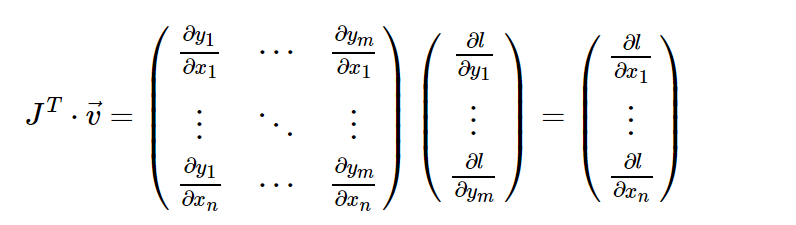
gradient是上图中的v向量

gradient参数具体什么意思 参考https://blog.csdn.net/Konge4/article/details/114955821


## 计算图
Autograd 在由函数对象组成的有向无环图（DAG）中记录数据（张量）和所有已执行的操作（以及由此产生的新张量）。  
在此 DAG 中，叶子是输入张量，根是输出张量。 通过从根到叶跟踪此图，可以使用链式规则自动计算梯度。  
DAG 在 PyTorch 中是动态的。要注意的重要一点是，图是从头开始重新创建的； 在每个.backward()调用之后，Autograd 开始填充新图。   
这正是**允许您在模型中使用控制流语句**的原因。 您可以根据需要在每次迭代中更改形状，大小和操作。

## 从 DAG 中排除

`torch.autograd`跟踪所有将其`requires_grad`标志设置为`True`的张量的操作。 对于不需要梯度的张量，将此属性设置为`False`会将其从梯度计算 DAG 中排除。

即使只有一个输入张量具有`requires_grad=True`，操作的输出张量也将需要梯度。



In [87]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True


在 NN 中，不计算梯度的参数通常称为**冻结参数**。 如果事先知道您不需要这些参数的梯度，则“冻结”模型的一部分很有用（通过减少自动梯度计算，这会带来一些性能优势）。迁移学习时小数据量冻结前几层的参数。  
从 DAG 中排除很重要的另一个常见用例是调整预训练网络

在微调中，我们冻结了大部分模型，通常仅修改分类器层以对新标签进行预测。 让我们来看一个小例子来说明这一点。 和以前一样，我们加载一个预训练的 resnet18 模型，并冻结所有参数。

In [93]:
from torch import nn, optim

model = torchvision.models.resnet18(pretrained=True)
print(model.fc)#resnet18最后一层是fc层
# Freeze all the parameters in the network
for param in model.parameters():
    #print(f"param:{param}")
    param.requires_grad = False
#假设我们要在具有 10 个标签的新数据集中微调模型。 
#我们可以简单地将其替换为充当我们的分类器的新线性层（默认情况下未冻结）。
model.fc = nn.Linear(512, 10)#现在，除了model.fc的参数外，模型中的所有参数都将冻结。 计算梯度的唯一参数是model.fc的权重和偏差。
optimizer = optim.SGD(model.fc.parameters(), lr=1e-2, momentum=0.9)## 仅仅对最后一层进行梯度下降

Linear(in_features=512, out_features=1000, bias=True)


## 神经网络

可以使用`torch.nn`包构建神经网络。

现在您已经了解了`autograd`，`nn`依赖于`autograd`来定义模型并对其进行微分。 `nn.Module`包含层，以及返回`output`的方法`forward(input)`。

例如，查看以下对数字图像进行分类的网络：

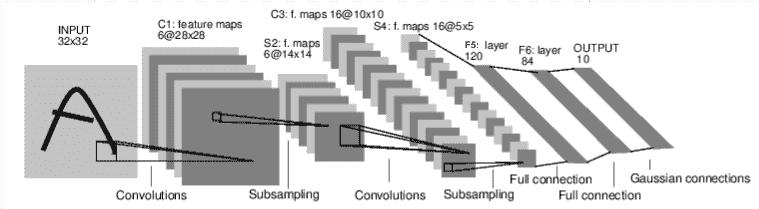

神经网络的典型训练过程如下：

- 定义网络结构
- 遍历输入数据集
- 通过网络处理输入
- 损失函数 代价函数
- 反向传播计算梯度
- 通常使用简单的更新规则来更新网络的权重：`weight = weight - learning_rate * gradient`

## 定义网络结构

让我们定义这个网络

In [132]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):#继承nn.Module类

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window 卷积-Relu-池化
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # 如果池化层滤波器(2, 2)是方阵，参数可以只写2
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension 变成一维
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


只需要定义forward函数，就可以使用autograd为您自动定义backward函数（计算梯度）。   
可以在forward函数中使用任何张量操作。  
模型的可学习参数由net.parameters()返回

In [131]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight  输出channel 输入channel 卷积核大小5×5
print(params[1].size())  # Relu's .weight
print(params[2].size())  # conv2's .weight
print(params[3].size())  # Relu's .weight
print(params[4].size())  # fn1's .weight
print(params[5].size())  # Relu's .weight
print(params[6].size())  # fn2's .weight
print(params[7].size())  # Relu's .weight
print(params[8].size())  # fn3's .weight
print(params[9].size())  # fn3's .weight 不理解

10
torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([16, 6, 5, 5])
torch.Size([16])
torch.Size([120, 400])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])


让我们尝试一个32x32随机输入。   
注意：该网络的预期输入大小（LeNet）为32x32。 要在 MNIST 数据集上使用此网络，请将图像从数据集中调整为32x32。

In [174]:
input = torch.randn(2, 1, 32, 32)
out = net(input)#？？？
print(out)

tensor([[-0.1415,  0.0801, -0.0476,  0.0609, -0.0171, -0.0153, -0.1649, -0.0772,
          0.1880, -0.0521],
        [-0.1287,  0.0741, -0.0552,  0.0542,  0.0049, -0.0360, -0.1703, -0.0779,
          0.1742, -0.0733]], grad_fn=<AddmmBackward0>)


使用随机梯度将所有参数和反向传播的梯度缓冲区归零：

In [134]:
net.zero_grad()
out.backward(torch.randn(1, 10))#不理解直接对out进行反向传播？？？？

注意

`torch.nn`仅支持小批量。 整个`torch.nn`包仅支持作为微型样本而不是单个样本的输入。

例如，`nn.Conv2d`将采用`nSamples x nChannels x Height x Width`的 4D 张量。

如果您只有一个样本，只需使用`input.unsqueeze(0)`添加一个假批量尺寸。

在继续之前，让我们回顾一下到目前为止所看到的所有类。
**回顾**：

- `torch.Tensor`-一个*多维数组*，支持诸如`backward()`的自动微分操作。 同样，保持相对于张量的梯度。
- `nn.Module`-神经网络模块。 *封装参数*的便捷方法，并带有将其移动到 GPU，导出，加载等的帮助器。
- `nn.Parameter`-一种张量，即将其分配为`Module`的属性时，自动注册为参数。
- `autograd.Function`-实现自动微分操作的正向和反向定义。 每个`Tensor`操作都会创建至少一个`Function`节点，该节点连接到创建`Tensor`的函数，并且编码其历史记录  

**目前为止，我们涵盖了**：

- 定义神经网络
- 处理输入并向后调用

**仍然剩下**：

- 计算损失
- 更新网络的权重  

## 损失函数

损失函数采用一对（输出，目标）输入，并计算一个值，该值估计输出与目标之间的距离。

`nn`包下有几种不同的[损失函数](https://pytorch.org/docs/nn.html#loss-functions)。 一个简单的损失是：`nn.MSELoss`，它计算输入和目标之间的均方误差。

In [149]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.6995, grad_fn=<MseLossBackward0>)


现在，如果使用.grad_fn属性向后跟随loss，您将看到一个计算图  
"""
    计算图如下：
    input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d  
          -> view -> linear -> relu -> linear -> relu -> linear 
          -> MSELoss
          -> loss

    """
因此，当我们调用loss.backward()时，整个图将被微分。 损失，并且图中具有requires_grad=True的所有张量将随梯度累积其.grad张量。

为了说明，让我们向后走几步：

In [168]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU 再往后就报错了？
#计算图终止于叶子AccumulateGrad节点

## 反向传播

要反向传播误差，我们要做的只是对`loss.backward()`。 不过，您需要清除现有的梯度，否则梯度将累积到现有的梯度中。

现在，我们将其称为`loss.backward()`，然后看一下向后前后`conv1`的偏差梯度。

In [169]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0073,  0.0055, -0.0059, -0.0064,  0.0062, -0.0022])


有两种方式直接把模型的参数梯度设成0:

model.zero_grad()

optimizer.zero_grad() # 当optimizer=optim.Optimizer(model.parameters())时，两者等效



In [170]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

但是，在使用神经网络时，您希望使用各种不同的更新规则，例如 SGD，Nesterov-SGD，Adam，RMSProp 等。为实现此目的，我们构建了一个小包装：torch.optim，可实现所有这些方法。 
# 训练分类器
## 数据处理

通常，当您必须处理图像，文本，音频或视频数据时，可以使用将数据加载到 NumPy 数组中的标准 Python 包。 然后，您可以将该数组转换为`torch.*Tensor`。

- 对于图像，Pillow，OpenCV 等包很有用
- 对于音频，请使用 SciPy 和 librosa 等包
- 对于文本，基于 Python 或 Cython 的原始加载，或者 NLTK 和 SpaCy 很有用 

专门针对视觉，我们创建了一个名为`torchvision`的包，其中包含用于常见数据集（例如 Imagenet，CIFAR10，MNIST 等）的数据加载器，以及用于图像（即`torchvision.datasets`和`torch.utils.data.DataLoader`）的数据转换器。

这提供了极大的便利，并且避免了编写样板代码。

在本教程中，我们将使用 CIFAR10 数据集。 它具有以下类别：“飞机”，“汽车”，“鸟”，“猫”，“鹿”，“狗”，“青蛙”，“马”，“船”，“卡车”。 CIFAR-10 中的图像尺寸为`3x32x32`，即尺寸为`32x32`像素的 3 通道彩色图像。
## 训练图像分类器
1使用torchvision加载并标准化 CIFAR10 训练和测试数据集   
2定义卷积神经网络  
3定义损失函数  
4根据训练数据训练网络  
5在测试数据上测试网络  
### 1.加载并标准化 CIFAR10

In [175]:
#加载并标准化 CIFAR10
import torch
import torchvision
import torchvision.transforms as transforms
#TorchVision 数据集的输出是[0, 1]范围的PILImage图像。 我们将它们转换为归一化范围[-1, 1]的张量
transform = transforms.Compose(#采用transforms.Compose()，将一系列的transforms有序组合，实现时按照这些方法依次对图像操作。
    [transforms.ToTensor(),#ToTensor()把灰度范围从(0,255)变换到(0,1)，Normalize()把(0,1)变换到(-1,1)
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])# Normalize标准化  均值为0.5标准差为0.5 最小值为0-0.5/0.5 = -1
#ToTensor：convert a PIL image to tensor (H*W*C) in range [0,255] to a torch.Tensor(C*H*W) in the range [0.0,1.0]
#root (string):数据集所在目录的根目录 如果download设置为True。“cifar-10-batches-py '”存在，则将被保存至该目录
#train ：如果为True，则从训练集创建数据集，否则从测试集创建。
#transform::(bool，可选)一个接受PIL图像的函数/变换 并返回转换后的版本。 如”transforms“,“RandomCrop”
#target_transform：(可调用，可选):一个作用于目的转换函数。
#download (bool，可选):如果为true，则从internet下载数据集 ,将其放在根目录中。 如果数据集已经下载，则不会 再次下载。

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)#下载图片 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)#加载图片

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


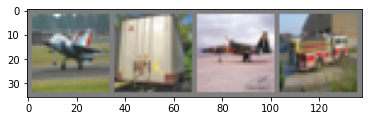

plane truck plane truck


In [184]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### 2.定义卷积神经网络
复制前面定义的神经网络，然后对其进行修改以获取 3 通道图像（而不是定义的 1 通道图像）。

In [185]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### 3.定义损失函数和优化器

In [186]:
#分类交叉熵损失 和带有动量的 SGD
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


### 4.训练网络
我们只需要遍历数据迭代器，然后将输入馈送到网络并进行优化即可。

In [187]:
for epoch in range(2):  # loop over the dataset multiple times 遍历两轮数据集

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels] ????????????????????????????????
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches 一批应该是4张图片 打印一次信息训练8000张
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.197
[1,  4000] loss: 1.860
[1,  6000] loss: 1.702
[1,  8000] loss: 1.611
[1, 10000] loss: 1.560
[1, 12000] loss: 1.494
[2,  2000] loss: 1.430
[2,  4000] loss: 1.385
[2,  6000] loss: 1.372
[2,  8000] loss: 1.360
[2, 10000] loss: 1.315
[2, 12000] loss: 1.284
Finished Training


快速保存我们训练过的模型：

In [188]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### 5.根据测试数据测试网络
第一步。 让我们显示测试集中的图像以使其熟悉

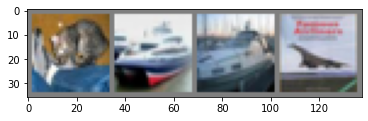

GroundTruth:    cat  ship  ship plane


In [189]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [191]:
#接下来，让我们重新加载保存的模型（注意：这里不需要保存和重新加载模型，我们只是为了说明如何这样做）：
net = Net()
net.load_state_dict(torch.load(PATH))
#好的，现在让我们看看神经网络对以上这些示例的看法：
outputs = net(images)
#输出是 10 类的概率。 一个类别的概率越高，网络就认为该图像属于特定类别。 因此，让我们获取最高概率的指数：
_, predicted = torch.max(outputs, 1)
#predicted = torch.max(outputs, 1)#only integer tensors of a single element can be converted to an index
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car  ship plane


那么，这里的 下划线_ 表示什么意思？

首先，torch.max()这个函数返回的是两个值，第一个值是具体的value（我们用下划线_表示），第二个值是value所在的index（也就是predicted）。

那么，这个 下划线_ 表示的就是具体的value，也就是输出的最大值。那么为什么用 下划线_，可不可以用其他的变量名称来代替，比如x？答案自然是可以的。

那么为什么这里选择用这么特殊的下划线？有没有特殊含义？这是因为我们不关心最大值是什么，而关心最大值对应的index是什么，所以选用下划线代表不需要用到的变量。比如在图像分类任务中，值所对应的index就对应着相应的类别class，当我们只关心网络预测的类别是什么，而不关心该类别的预测概率是多少时，就选择使用下划线_。

其次，这里的数字1表示什么意思？

数字1其实可以写为dim=1，这里简写为1，python也可以自动识别，dim=1表示输出所在行的最大值，若改写成dim=0则输出所在列的最大值。
让我们看一下网络在整个数据集上的表现


In [193]:
print(outputs.data)
print(predicted)

tensor([[-0.1463, -1.8227,  1.0487,  1.9772, -1.0865,  1.5435,  0.1696, -0.4909,
          0.6774, -1.0619],
        [ 3.8355,  4.8477, -1.6665, -2.8780, -2.9966, -4.0660, -4.1562, -3.1835,
          4.0261,  3.8247],
        [ 2.5592,  2.3219, -0.9064, -1.7574, -1.4927, -2.8934, -3.5033, -1.8236,
          3.8209,  1.9526],
        [ 3.2051,  0.6922, -0.1375, -1.5798, -0.4601, -2.4824, -2.3076, -1.3081,
          2.6592,  0.9379]])
tensor([3, 1, 8, 0])


In [194]:
correct = 0
total = 0
with torch.no_grad():#在测试集上 不要更新参数
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


with torch.no_grad的作用
在该模块下，所有计算得出的tensor的requires_grad都自动设置为False。

即使一个tensor（命名为x）的requires_grad = True，在with torch.no_grad计算，由x得到的新tensor（命名为w-标量）requires_grad也为False，且grad_fn也为None,即不会对w求导。
原文链接：https://blog.csdn.net/sazass/article/details/116668755  
哪些类的表现良好，哪些类的表现不佳怎么看?

In [195]:
class_correct = list(0. for i in range(10))#以浮点数初始化
class_total = list(0. for i in range(10))
print(class_correct)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [199]:
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()#没有squeeze也能运行 不知道什么原理
        for i in range(4):# 一批4张图片
            label = labels[i]
            class_correct[label] += c[i].item()#预测对的类数量 c[i].item()值为False 或 True
            class_total[label] += 1#各个类的分母

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 60 %
Accuracy of   car : 64 %
Accuracy of  bird : 56 %
Accuracy of   cat : 31 %
Accuracy of  deer : 42 %
Accuracy of   dog : 39 %
Accuracy of  frog : 58 %
Accuracy of horse : 63 %
Accuracy of  ship : 72 %
Accuracy of truck : 60 %


## 在 GPU 上进行训练
深度学习自然需要 GPU 来加快训练速度的。所以接下来介绍如果是在 GPU 上训练，应该如何实现。

首先，需要检查是否有可用的 GPU 来训练，代码如下：

In [200]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


将网络参数和数据都转移到 GPU 上：  
net.to(device)  
还必须将每一步的输入和目标也发送到 GPU：  
inputs, labels = inputs.to(device), labels.to(device)
### 使用cpu训练时间 epoch = 3

In [201]:
import time
# 在 GPU 上训练注意需要将网络和数据放到 GPU 上
#net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

start = time.time()
for epoch in range(3):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 获取输入数据
        inputs, labels = data
        #inputs, labels = inputs.to(device), labels.to(device)
        # 清空梯度缓存
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 打印统计信息
        running_loss += loss.item()
        if i % 2000 == 1999:
            # 每 2000 次迭代打印一次信息
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training! Total cost time: ', time.time() - start)

[1,  2000] loss: 1.233
[1,  4000] loss: 1.227
[1,  6000] loss: 1.213
[1,  8000] loss: 1.203
[1, 10000] loss: 1.193
[1, 12000] loss: 1.181
[2,  2000] loss: 1.105
[2,  4000] loss: 1.113
[2,  6000] loss: 1.097
[2,  8000] loss: 1.092
[2, 10000] loss: 1.139
[2, 12000] loss: 1.132
[3,  2000] loss: 1.023
[3,  4000] loss: 1.060
[3,  6000] loss: 1.030
[3,  8000] loss: 1.057
[3, 10000] loss: 1.028
[3, 12000] loss: 1.027
Finished Training! Total cost time:  130.85511445999146


### Gpu训练

In [202]:
# 在 GPU 上训练注意需要将网络和数据放到 GPU 上
net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

start = time.time()
for epoch in range(3):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 获取输入数据
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # 清空梯度缓存
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 打印统计信息
        running_loss += loss.item()
        if i % 2000 == 1999:
            # 每 2000 次迭代打印一次信息
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training! Total cost time: ', time.time() - start)

[1,  2000] loss: 0.950
[1,  4000] loss: 0.974
[1,  6000] loss: 0.992
[1,  8000] loss: 0.996
[1, 10000] loss: 1.007
[1, 12000] loss: 0.974
[2,  2000] loss: 0.916
[2,  4000] loss: 0.926
[2,  6000] loss: 0.925
[2,  8000] loss: 0.938
[2, 10000] loss: 0.966
[2, 12000] loss: 0.943
[3,  2000] loss: 0.828
[3,  4000] loss: 0.904
[3,  6000] loss: 0.886
[3,  8000] loss: 0.918
[3, 10000] loss: 0.926
[3, 12000] loss: 0.918
Finished Training! Total cost time:  176.04601073265076


训练结果反而变慢了  不知道什么原理   
再看下经过8轮epoch后测试集准确率

In [204]:
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):# 一批4张图片
            label = labels[i]
            class_correct[label] += c[i].item()#预测对的类数量 c[i].item()值为False 或 True
            class_total[label] += 1#各个类的分母

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 59 %
Accuracy of   car : 66 %
Accuracy of  bird : 56 %
Accuracy of   cat : 36 %
Accuracy of  deer : 44 %
Accuracy of   dog : 40 %
Accuracy of  frog : 60 %
Accuracy of horse : 64 %
Accuracy of  ship : 74 %
Accuracy of truck : 62 %


Accuracy of plane : 60 %  
Accuracy of   car : 64 %  
Accuracy of  bird : 56 %  
Accuracy of   cat : 31 %  
Accuracy of  deer : 42 %  
Accuracy of   dog : 39 %  
Accuracy of  frog : 58 %  
Accuracy of horse : 63 %  
Accuracy of  ship : 72 %  
Accuracy of truck : 60 %  
和只训练2个epoch相比 准确率平均有2个百分点的提升

In [205]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)
#net = Net()
#net.load_state_dict(torch.load(PATH))